In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn

In [41]:
data_assignment = pd.read_csv("data/assignment_red.csv")
data_assignor = pd.read_csv("data/assignor_red.csv")
data_assignee = pd.read_csv("data/assignee_red.csv")
data_documentid = pd.read_csv("data/documentid_red.csv")

data_patents = pd.read_pickle('../info_patents')

#same dataframe with good Processing time values 
#some process_time_value where dates instead of int
data_patents_process = data_patents[data_patents['patent_processing_time'].apply(lambda x: str(x).isdigit())]
data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)
#data_patents_process = data_patents_process[data_patents_process['patent_processing_time'].apply(lambda x: x<20000)]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-41-f28101954b84>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)


In [3]:
rf_id = data_assignment['rf_id']
data = data_assignment.copy()
data = data.join(data_assignee.set_index('rf_id'), on='rf_id')
data = data.join(data_assignor.set_index('rf_id'), on='rf_id')
data = data.join(data_documentid.set_index('rf_id'), on='rf_id')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269411 entries, 0 to 66670
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rf_id           269411 non-null  int64  
 1   file_id         269411 non-null  int64  
 2   cname           269411 non-null  object 
 3   caddress_1      269411 non-null  object 
 4   caddress_2      269399 non-null  object 
 5   caddress_3      199077 non-null  object 
 6   caddress_4      20478 non-null   object 
 7   reel_no         269411 non-null  int64  
 8   frame_no        269411 non-null  int64  
 9   convey_text     269410 non-null  object 
 10  record_dt       269411 non-null  object 
 11  last_update_dt  269411 non-null  object 
 12  page_count      269411 non-null  int64  
 13  purge_in        269411 non-null  object 
 14  ee_name         269411 non-null  object 
 15  ee_address_1    245741 non-null  object 
 16  ee_address_2    76270 non-null   object 
 17  ee_city    

## Number of patents sold per assignor

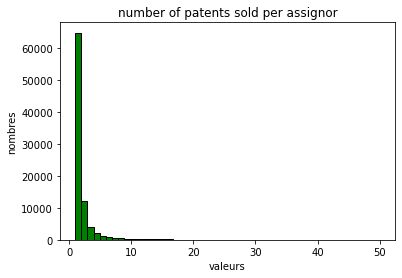

DescribeResult(nobs=89954, minmax=(1, 7206), mean=2.994986326344576, variance=1095.9375533760206, skewness=137.1690365892033, kurtosis=26675.251240938414)

In [5]:
plt.hist(data['or_name'].value_counts(), range = (1,50), bins = 50, color = 'green',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents sold per assignor')
plt.show()

stats.describe(data['or_name'].value_counts().to_numpy())

## Number of patents sold per assignee

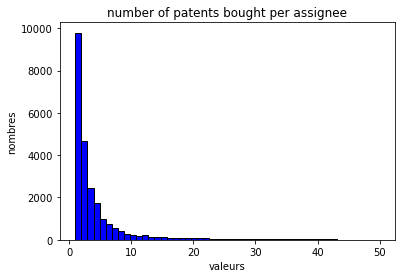

DescribeResult(nobs=24765, minmax=(1, 9890), mean=10.878699777912376, variance=10974.055064372991, skewness=57.37574927062565, kurtosis=4509.1416196454875)

In [6]:
plt.hist(data['ee_name'].value_counts(), range = (1,50), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents bought per assignee')
plt.show()

stats.describe(data['ee_name'].value_counts().to_numpy())

## Number of transactions with the same assignor/assignee

In [7]:
data['or_ee'] = data['or_name'] + data['ee_name']

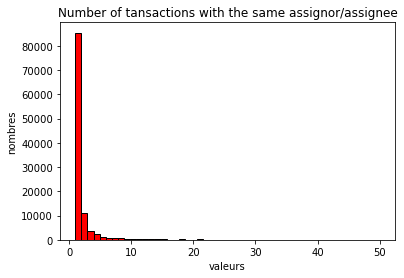

DescribeResult(nobs=109452, minmax=(1, 915), mean=2.4614534225048423, variance=165.29585268284, skewness=32.08765313963201, kurtosis=1487.82247912291)

In [8]:
plt.hist(data['or_ee'].value_counts(), range = (1,50), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

stats.describe(data['or_ee'].value_counts().to_numpy())

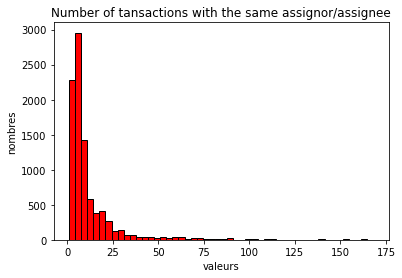

In [9]:
value_count = data['or_ee'].value_counts()
res = []
for i in range (len(value_count)):
    if value_count[i]>3 : 
        res.append(value_count[i])

plt.hist(res, range = (1,168), bins = 50, color = 'red',edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

## Number of transactions with the same patent

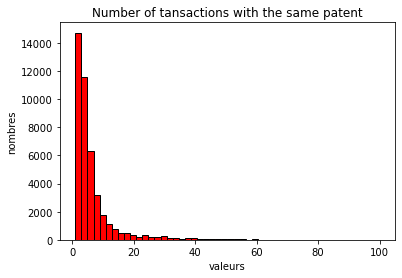

DescribeResult(nobs=43077, minmax=(1, 269), mean=6.254172760405785, variance=101.66361924148752, skewness=8.34154931625834, kurtosis=128.28822835436046)

In [10]:
plt.hist(data['grant_doc_num'].value_counts(), range = (1,100), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same patent')
plt.show()

stats.describe(data['grant_doc_num'].value_counts().to_numpy())

We can see here that a patent that is traded is in average traded 6 times. 

============================================================================================

# All patents

In [11]:
data_patents['marked'].value_counts()

0.0    1891801
1.0      23910
Name: marked, dtype: int64

## Proportion of marked patents

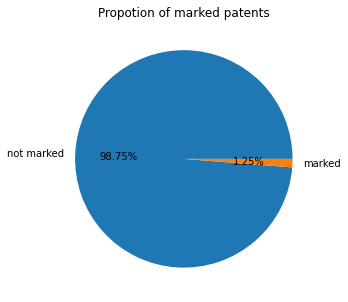

In [12]:
plt.figure(figsize=(5,5))
plt.pie(x = data_patents['marked'].value_counts(), labels = ['not marked','marked'], autopct='%1.2f%%')
plt.title('Propotion of marked patents')
plt.show()

## Processing Time for patents 

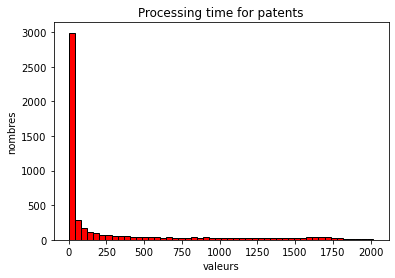

In [13]:
plt.hist(data_patents_process['patent_processing_time'].value_counts(), range = (1,2018), bins = 50, color = 'red',
            edgecolor = 'black')

plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Processing time for patents')
plt.show()

In [25]:

data_patents_process['patent_processing_time'].describe()

<ipython-input-25-c61f9e87bc22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)


count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

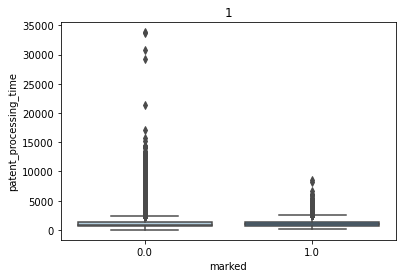

In [42]:
ax = sn.boxplot(x="marked", y="patent_processing_time", palette="Blues", data=data_patents_process).set_title("1")
                                                                                                                                                                                    

Here we see that the max is higher when the patent is not marked 

In [44]:
data_patents_process['patent_processing_time'].describe()

count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

the processing time is in more than 50% of the time between 600 and 1400 days